## **Démonstration de la dérivée de la fonction sigmoïde**

On a

$$
\sigma'(z) = \left( \frac{1}{1 + e^{-z}} \right)'
$$

Et on a :

$$
\left(\frac{1}{u(z)}\right)' = -\frac{u'(z)}{(u(z))^2}
$$

---

Calculons $ u'(z) $:
$ u(z) = 1 + e^{-z} \quad \Rightarrow \quad u'(z) = -e^{-z} $

Ainsi :

$$
\sigma'(z) = -\frac{-e^{-z}}{(1 + e^{-z})^2} = \frac{e^{-z}}{(1 + e^{-z})^2}
$$

---

donc :
$$
\sigma'(z) =  \left( \frac{1}{1 + e^{-z}} \right) \left( \frac{e^{-z}}{1 + e^{-z}} \right) = \left( \frac{1}{1 + e^{-z}} \right) \left( \frac{e^{-z} + 1 - 1}{1 + e^{-z}} \right) = \left( \frac{1}{1 + e^{-z}} \right) \left( 1 - \frac{ 1}{1 + e^{-z}} \right)
$$

---
Alors :

$$
\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))
$$

## **Le role de seed :**

La fonction **seed** permet d'avoir toujours les mêmes poids initiaux et donc de rendre l'entraînement du modèle prévisible et comparable.

## **Les Démonstrations des derivees**

On a :

- $Z_1 = XW_1 + b_1$
- $A_1 = \sigma(Z_1)$
- $Z_2 = A_1W_2 + b_2$
- $A_2 = \sigma(Z_2)$
- $L = \frac{1}{m} \sum_{i=1}^m (y_i - A_{2,i})^2$

---
---

## 1.Calculons  $\frac{\partial L}{\partial Z_2}$ :


$$ \frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_2} \cdot \frac{\partial A_2}{\partial Z_2} $$

On a donc :

$$
\frac{\partial L}{\partial A_2} = \frac{\partial}{\partial A_2} \left( \frac{1}{m} \sum_{i=1}^{m} (y_i - A_{2i})^2 \right)
$$

$$
= \frac{\partial}{\partial A_2} \left( \frac{1}{m} (y - A_2)^2 \right)
$$

$$
= \frac{-2}{m} (y - A_2) = \frac{2}{m} (A_2 - y)
$$

Et :

$$ A_2 = \sigma(Z_2) \quad \Rightarrow \quad \frac{\partial A_2}{\partial Z_2} = \sigma'(Z_2) $$

Donc :

$$
\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_2} \cdot \frac{\partial A_2}{\partial Z_2} = \frac{2}{m} (A_2 - y) \sigma'(Z_2)
$$

---

## 2.Calculons $\frac{\partial L}{\partial W_2}$ :

$$
\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial W_2}
$$



Et on a :

$$
Z_2 = A_1 W_2 + b_2 \Rightarrow \frac{\partial Z_2}{\partial W_2} = A_1
$$


Donc :

$$
\frac{\partial L}{\partial W_2} =  \frac{\partial L}{\partial Z_2} \cdot A_1
\Rightarrow
\frac{\partial L}{\partial W_2} = A_1^T \cdot \frac{\partial L}{\partial Z_2}
$$

---

## 3.Calculons $\frac{\partial L}{\partial b_2}$ :


$$
\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial b_2}
$$

On a  :

$$
Z_2 = A_1W_2 + b_2 \quad \Rightarrow \quad \frac{\partial Z_2}{\partial b_2} = 1
$$

Donc :

$$
\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial Z_2}
$$

---

## 4.Calculons $\frac{\partial L}{\partial Z_1}$ :

$$
\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial Z_2} \cdot \frac{\partial Z_2}{\partial A_1} \cdot \frac{\partial A_1}{\partial Z_1}
$$

On a :

$$
Z_2 = A_1W_2 + b_2 \quad \Rightarrow \quad \frac{\partial Z_2}{\partial A_1} = W_2
$$

Et :

$$
A_1 = \sigma(Z_1) \quad \Rightarrow \quad \frac{\partial A_1}{\partial Z_1} = \sigma'(Z_1)
$$

Donc :

$$
\frac{\partial L}{\partial Z_1} = \left( \frac{\partial L}{\partial Z_2} W_2^T \right) \sigma'(Z_1)
$$

---

## 5.Calculons $\frac{\partial L}{\partial W_1}$ :


$$
\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial Z_1} \cdot \frac{\partial Z_1}{\partial W_1}
$$

On a :

$$
Z_1 = X W_1 + b_1 \quad \Rightarrow \quad \frac{\partial Z_1}{\partial W_1} = X
$$

Donc :

$$
\frac{\partial L}{\partial W_1} =  \frac{\partial L}{\partial Z_1} \cdot X
\Rightarrow
\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial Z_1}
$$

---

## 6.Calculons $\frac{\partial L}{\partial b_1}$ :


$$
\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial Z_1} \times \frac{\partial Z_1}{\partial b_1}
$$

On a :

$$
Z_1 = XW_1 + b_1 \quad \Rightarrow \quad \frac{\partial Z_1}{\partial b_1} = 1
$$

Donc :

$$
\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial Z_1}
$$

---
### Remarque :
*(On transpose juste pour bien faire correspondre les dimensions.)*

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Etape 1 : Définir la fonction d’activation sigmoïde et sa dérivée
def sigmoid(x):
    result = 1 / (1 + np.exp(-x))  # Remplacez par la formule de la sigmoide
    # Assertion : Verifier que les sorties sont entre 0 et 1
    assert np.all((result >= 0) & (result <= 1)), " Sigmoide shdould be between 0 and 1"
    return result

def sigmoid_derivative(x):
    # A COMPLETER : Implementez la derivee de la sigmoide
    s = sigmoid(x)
    result = s * (1 - s)  # Remplacez None par la formule de la derivee
    # Assertion : Verifier que la derivee est positive ou nulle
    assert np.all(result >= 0), "Dérivée de la sigmoïde doit être >= 0"
    # Assertion : Verifier que sigmoid_derivative (0) = 0.25
    if np.isscalar(x) and x == 0:
        assert np.isclose(result, 0.25), "Dérivée de la sigmoïde à 0 doit être 0.25"
    return result

In [ ]:
# Etape 2 : Définir la classe MLP
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, seed=42):
        # Fixer le seed pour la reproductibilit
        np.random.seed(seed)

        # Initialisation des poids et biais
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate

        # Assertions : Vérifier les dimensions
        assert self.W1.shape == (input_size, hidden_size), "Mauvaise dimension pour W1"
        assert self.b1.shape == (1, hidden_size), "Mauvaise dimension pour b1"
        assert self.W2.shape == (hidden_size, output_size), "Mauvaise dimension pour W2"
        assert self.b2.shape == (1, output_size), "Mauvaise dimension pour b2"

    # Etape 3 : Propagation avant
    def forward(self, X):
        # A COMPLETER : Implementez la propagation avant
        self.Z1 = X @ self.W1 + self.b1 # Calcul de Z1
        self.A1 = sigmoid(self.Z1) # Activation de la couche c a c h e
        self.Z2 = self.A1 @ self.W2 + self.b2 # Calcul de Z2
        self.A2 = sigmoid(self.Z2) # Activation de la couche de sortie


        # Assertions : Vérifier les dimensions
        assert self.A1.shape == (X.shape[0], self.W1.shape[1]), "Mauvaise dimension pour A1"
        assert self.A2.shape == (X.shape[0], self.W2.shape[1]), "Mauvaise dimension pour A2"
        # Assertion : Verifier que A2 est entre 0 et 1
        assert np.all((self.A2 >= 0) & (self.A2 <= 1)), "Sortie A2 doit être entre 0 et 1"

        return self.A2

    # Etape 4 : Calcul de la perte
    def compute_loss(self, y_true, y_pred):
        # A COMPLETER : Implementez le calcul de la perte (MSE)
        loss = np.mean((y_true - y_pred) ** 2)   # Remplacez par la formule de la MSE
        # Assertion : Verifier que la perte est positive ou nulle
        assert loss >= 0, "La perte doit être positive ou nulle"

        # Assertion : Verifier que la perte est 0 si y_true = y_pred
        if np.array_equal(y_true, y_pred):
            assert np.isclose(loss, 0), "La perte doit être 0 si y_true = y_pred"
        return loss

    # Etape 5 : Rétropropagation
    def backward(self, X, y, y_pred):
        m = X.shape[0]

        #A COMPLETER : Implementez la retropropagation
        # Gradient de la couche de sortie
        dZ2 = 2 * (y_pred - y) * sigmoid_derivative(self.Z2) # Gradient de Z2
        dW2 = np.dot(self.A1.T, dZ2) / m # Gradient de W2
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m # Gradient de b2


        # Gradient de la couche cachée
        dA1 = np.dot(dZ2, self.W2.T) # Gradient de A2
        dZ1 = dA1 * sigmoid_derivative(self.Z1) # Gradient de Z2
        dW1 = np.dot(X.T, dZ1) / m # Gradient de W1
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m # Gradient de b1

        # Assertions : Vérifier les dimensions des gradients
        assert dW1.shape == self.W1.shape, "Mauvaise dimension pour dW1"
        assert db1.shape == self.b1.shape, "Mauvaise dimension pour db1"
        assert dW2.shape == self.W2.shape, "Mauvaise dimension pour dW2"
        assert db2.shape == self.b2.shape, "Mauvaise dimension pour db2"

        # Mise à jour des poids et biais
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    # Etape 6 : Entrainement
    def train(self, X, y, epochs):
        prev_loss = float('inf')
        losses = []
        for epoch in range(epochs):
            y_pred = self.forward(X) # Gradient de W1
            loss = self.compute_loss(y, y_pred) # Gradient de W1
            losses.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss : {loss}")
            # Assertion : Verifier que la perte diminue (ou restestable )
            assert loss <= prev_loss or np.isclose(loss, prev_loss), "La perte doit diminuer ou rester stable"
            prev_loss = loss
            self.backward(X, y, y_pred)
        return losses

In [6]:
# Etape 7 : Test du modèle
if __name__ == "__main__":
    # Données XOR
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Création et entraînement du MLP
    mlp = MLP(input_size=2, hidden_size=4, output_size=1, learning_rate=2, seed=28)
    losses = mlp.train(X, y, epochs=10000)

    # Prédictions
    predictions = mlp.forward(X)
    print("\nPrédictions après entraînement :")
    for i in range(len(X)):
        print(f"Entrée : {X[i]}, Prediction : {predictions[i][0]:.4f}, Attendu : {y[i][0]}")
        # Assertion : Verifier que les predictions sont coherentes avec XOR
        if y[i][0] == 0:
            assert predictions[i][0] < 0.5, f"Prediction pour {X[i]} devrait être < 0.5"
        else:
            assert predictions[i][0] > 0.5, f"Prediction pour {X[i]} devrait être > 0.5"

Epoch 0, Loss : 0.3649476107133394
Epoch 100, Loss : 0.1928919957074199
Epoch 200, Loss : 0.09664556560610649
Epoch 300, Loss : 0.023658855385539062
Epoch 400, Loss : 0.010014987706677105
Epoch 500, Loss : 0.005884222428260522
Epoch 600, Loss : 0.004043711444576799
Epoch 700, Loss : 0.00303455056831694
Epoch 800, Loss : 0.0024074240821965417
Epoch 900, Loss : 0.001983974817043022
Epoch 1000, Loss : 0.0016807243270178288
Epoch 1100, Loss : 0.0014538329798140927
Epoch 1200, Loss : 0.0012782362485055563
Epoch 1300, Loss : 0.0011386375206094458
Epoch 1400, Loss : 0.0010252061484952487
Epoch 1500, Loss : 0.0009313535701143372
Epoch 1600, Loss : 0.0008525080386895204
Epoch 1700, Loss : 0.0007854031982233345
Epoch 1800, Loss : 0.0007276464589801559
Epoch 1900, Loss : 0.0006774471629266124
Epoch 2000, Loss : 0.0006334397903537427
Epoch 2100, Loss : 0.0005945657172072552
Epoch 2200, Loss : 0.0005599921661835653
Epoch 2300, Loss : 0.0005290554315046357
Epoch 2400, Loss : 0.0005012203295795038
Ep

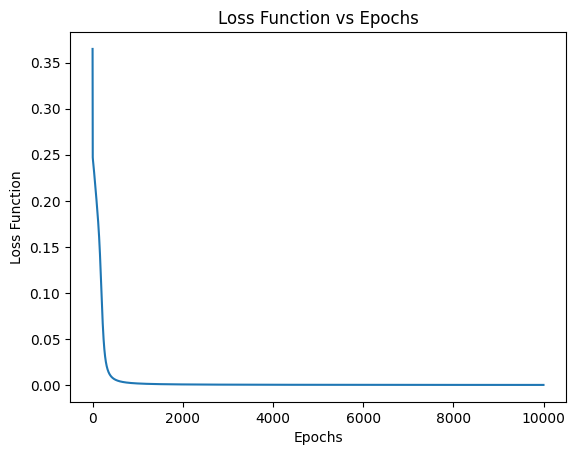

In [7]:
plt.plot(losses)
plt.ylabel('Loss Function')
plt.xlabel('Epochs')
plt.title('Loss Function vs Epochs')
plt.show()

On constate alors que notre modéle a été bien convergé avec des hyperparamatères de :
* un taux d'apprentissage $ \eta = 2 $
* $ \text{seed} = 28  $
* et un nombre des $ \text{ epochs} = 10000 $